## Data Preparation
#### First we analyze the data:
1. Search for missing values
2. Check dataset balance
#### Then we use NLP techniques such as:
1. Stemming
2. Tokenization
3. Stop-word removal

In [1]:
# Imports
import pandas as pd
import seaborn as sns

from phrase_breaker import phrase_breaker

## Data Analysis

In [2]:
# Import the data onto dataframe
data = pd.read_csv("../reviews.csv", names=["Review Text", "Stars", "Polarity"])
data

,Review Text,Stars,Polarity
0,This is an extremely basic course. Machine lea...,1,negative
1,The course is ok but the certification procedu...,1,negative
2,"I just started week 3 , I have to admit that I...",1,negative
3,"However good the material and lectures may be,...",1,negative
4,Have to give a star so I will give it one. Ot...,1,negative
...,...,...,...
1289,"Going through the whole process, I really thin...",5,positive
1290,"Hello, I just want to say that this course was...",5,positive
1291,I wanted to say how Iam grateful for this oppu...,5,positive
1292,"I found this course has a good pace, I feel li...",5,positive


In [3]:
# Look for null values
data.isnull().values.any()

False

<AxesSubplot:xlabel='Polarity', ylabel='count'>

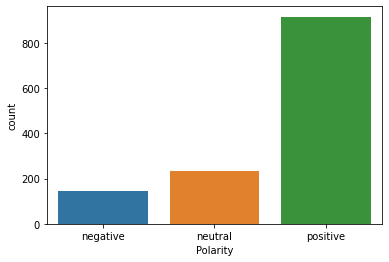

In [4]:
# Check dataset balance
sns.countplot(x="Polarity", data=data)

In [5]:
# Creating dataframe with original vocabulary (existent words)
# Mainly for performance evaluation purposes

original = set()
data["Review Text"].str.split().apply(original.update)

original_data = {
    'Number of Words': [len(list(original))],
    'Type': ["original"],
}

pf_df = pd.DataFrame(original_data)
pf_df

,Number of Words,Type
0,11706,original


<AxesSubplot:xlabel='Type', ylabel='Number of Words'>

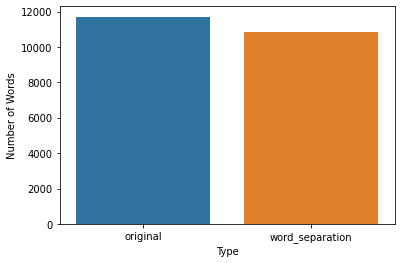

In [6]:
# Word Separation
benchmark_df = data.copy()
benchmark_df["Review Text"] = benchmark_df["Review Text"].apply(phrase_breaker)

word_sep = set()
benchmark_df["Review Text"].str.split().apply(word_sep.update)

word_sep_data = {
    'Number of Words': len(list(word_sep)),
    'Type': "word_separation",
}

pf_df = pf_df.append(word_sep_data, ignore_index=True)

sns.barplot(x="Type", y="Number of Words", data=pf_df)

<AxesSubplot:xlabel='Type', ylabel='Number of Words'>

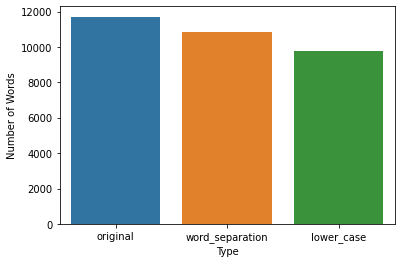

In [7]:
# Lower case
benchmark_df["Review Text"] = benchmark_df["Review Text"].apply(str.lower)

lower_case = set()
benchmark_df["Review Text"].str.split().apply(lower_case.update)

lower_case_data = {
    'Number of Words': len(list(lower_case)),
    'Type': "lower_case",
}

pf_df = pf_df.append(lower_case_data, ignore_index=True)

sns.barplot(x="Type", y="Number of Words", data=pf_df)

<AxesSubplot:xlabel='Type', ylabel='Number of Words'>

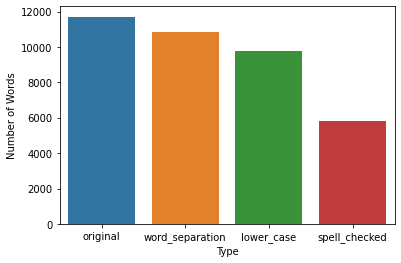

In [9]:
benchmark_df["Review Text"] = benchmark_df["Review Text"].apply(opinion_spell_checker)

spell_checker = set()
benchmark_df["Review Text"].str.split().apply(spell_checker.update)

spell_checker_data = {
    'Number of Words': len(list(spell_checker)),
    'Type': "spell_checked",
}

pf_df = pf_df.append(spell_checker_data, ignore_index=True)

sns.barplot(x="Type", y="Number of Words", data=pf_df)

## Data Preparation